In [2]:
#Importing the libraries
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#Loading the template and input image
img_bgr = cv.imread('InputImage.jpg')
img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)
template = cv.imread('EmptyShelf.jpg',0)

In [3]:
#Fetching the height and width of the template
w, h = template.shape[::-1]

#Template matching
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)

#Defining the treshold value for which matching templates would be filtered
threshold = 0.91
loc = np.where( res >= threshold)

In [4]:
#Creating a list of the predicted bounding boxes with their start and end coordinates
boundingBoxes = []
for pt in zip(*loc[::-1]):
    boundingBoxes.append([pt[0], pt[1], (pt[0] + w), (pt[1] + h)])
    
boxes = np.array(boundingBoxes)

In [5]:
#Importing the function for implementing non-maximum supression 
from nonmaxsupression.nms import non_max_suppression_fast

#Implementing non-maximum supression on the bounding boxes predicted by template matching
pick = non_max_suppression_fast(boxes, 0.3)

In [29]:
i = 1
# loop over the picked bounding boxes and draw them
for (startX, startY, endX, endY) in pick:
    cv.rectangle(img_bgr, (startX, startY), (endX, endY), (255, 0, 0), 8)
    #cv.putText(img_rgb, 'OpenCV', org, font,  
                   #fontScale, color, 10, cv.LINE_AA)
    
    cv.putText(img_bgr, str(i), (startX, startY), cv.FONT_HERSHEY_SIMPLEX,  
                   1, (0, 255, 0), 10, cv.LINE_AA)
    
    print("Detected empty shelf {0} is at location xmin={1}, ymin={2}, xmax={3}, ymax={4}".format(i,startX,startY,endX,endY))
    i += 1

Detected empty shelf 1 is at location xmin=96, ymin=587, xmax=234, ymax=770
Detected empty shelf 2 is at location xmin=324, ymin=419, xmax=462, ymax=602
Detected empty shelf 3 is at location xmin=3, ymin=413, xmax=141, ymax=596


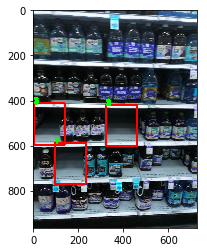

In [30]:
plt.imshow(img_bgr)

In [31]:
cv.imwrite('OutputImage.jpg', img_bgr)

True